In [98]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

## load the data

In [99]:
X = pd.read_csv('dataR2.csv', sep = ',')
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [100]:
y = X['Classification']
labels = y.unique()
print('Unique values for y:', labels)
X.drop(columns={'Classification'}, inplace = True)
X.info()
variables = list(X.columns)
print(variables)

Unique values for y: [1 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          116 non-null    int64  
 1   BMI          116 non-null    float64
 2   Glucose      116 non-null    int64  
 3   Insulin      116 non-null    float64
 4   HOMA         116 non-null    float64
 5   Leptin       116 non-null    float64
 6   Adiponectin  116 non-null    float64
 7   Resistin     116 non-null    float64
 8   MCP.1        116 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 8.3 KB
['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']


# PCA without scaling

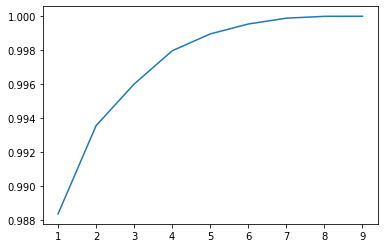

In [101]:
from sklearn.decomposition import PCA

sz = len(X.columns)
pca = PCA(n_components=sz)
pca.fit(X) 
ss = 0; xx = []; yy = []
for i in range(sz):
    ss += pca.explained_variance_ratio_[i]
    xx.append(i+1)
    yy.append(ss)
plt.plot(xx,yy)

In [102]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X) 

PCA(n_components=2)

In [103]:
pca.explained_variance_ratio_

array([0.98834735, 0.00520382])

In [104]:
X_pca = pca.transform(X)
X_pca.shape

(116, 2)

PCA normalizes and whitens the data, which means that the data is now centered on both components with unit variance:

In [105]:
X_pca.min(axis=0)

array([-488.42192503,  -36.02613015])

In [106]:
X_pca.max(axis=0)

array([1165.79040887,  112.92943775])

In [107]:
X_pca.mean(axis=0)

array([-4.65527999e-14,  6.00286104e-15])

In [108]:
X_pca.std(axis=0, ddof=1)

array([346.00471794,  25.10661987])

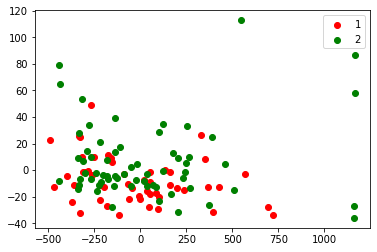

In [109]:
colors = 'r','g','b','c','m','y','k','gray'
for i, c, label in zip(labels, colors, labels): #labels 2x to get the actual values and respect classifications
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=label) #first component (x), correspondent to column 0 of the PCA (PC1), and second (y), to column 1 of the PCA (PC2)
plt.legend()

# PCA with scaling

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X),columns=X.columns)
X_scaled.shape

(116, 9)

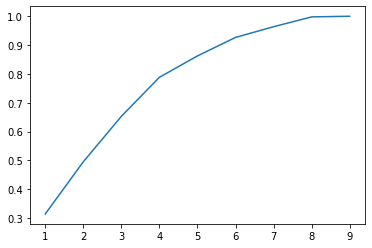

In [111]:
from sklearn.decomposition import PCA

sz = len(X_scaled.columns)
pca = PCA(n_components=sz)
pca.fit(X_scaled) 
ss = 0; xx = []; yy = []
for i in range(sz):
    ss += pca.explained_variance_ratio_[i]
    xx.append(i+1)
    yy.append(ss)
plt.plot(xx,yy)

In [112]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled) 

PCA(n_components=2)

In [113]:
pca.explained_variance_ratio_

array([0.31421633, 0.18103488])

In [114]:
X_pca = pca.transform(X_scaled)
X_pca.shape

(116, 2)

In [115]:
X_pca.min(axis=0)

array([-0.67107069, -0.63951172])

In [116]:
X_pca.max(axis=0)

array([1.20327897, 0.67676751])

In [117]:
X_pca.mean(axis=0)

array([3.44551973e-17, 7.17816611e-18])

In [118]:
X_pca.std(axis=0, ddof=1)

array([0.33472295, 0.25406933])

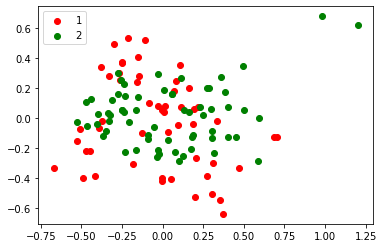

In [119]:
colors = 'r','g','b','c','m','y','k','gray'
for i, c, label in zip(labels, colors, labels): #labels 2x to get the actual values and respect classifications
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=label) #first component (x), correspondent to column 0 of the PCA (PC1), and second (y), to column 1 of the PCA (PC2)
plt.legend()

Question: How good is the result of the plot representation above?
\\ Answer: It depends of what you are trying to do next! Is it to:
(1) Identify outliers?
(2) Identify clusters?
(3) Make a predictor?

# What is the contribution of each variable to the first Principal Component? (Susana Valente's Question)

In [120]:
loading_variables = pd.Series(pca.components_[0], index = variables)
sorted_loading_variables = loading_variables.abs().sort_values(ascending=False)
top_variables = sorted_loading_variables[0:9].index.values

print(loading_variables[top_variables])

BMI            0.562178
Leptin         0.501404
Insulin        0.293300
Glucose        0.273223
HOMA           0.267061
MCP.1          0.261040
Adiponectin   -0.225705
Resistin       0.209268
Age            0.194100
dtype: float64
